<a align="left" href="https://ultralytics.com/yolov5" target="_blank">
<img width="1024", src="https://user-images.githubusercontent.com/26833433/125273437-35b3fc00-e30d-11eb-9079-46f313325424.png"></a>

This is the **official YOLOv5 🚀 notebook** by **Ultralytics**, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://ultralytics.com. Thank you!

# 시각화 실습 준비
- Weights&Biases(wandb): 머신러닝 모델 개발 보조도구
- 1) Weights&Biases 가입: https://wandb.ai/
- 2) wandb setting 접속: https://wandb.ai/settings
- 3) API key 복사: key 아이콘 옆 숫자 클릭하면 복사됨, wandb 사용할 때 API key 붙여넣기
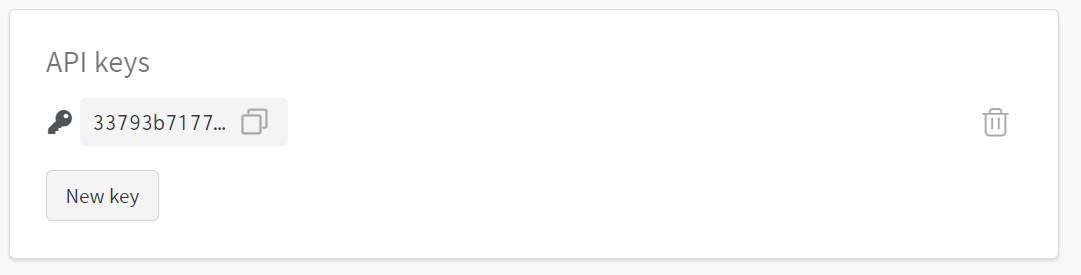

630f827032fbf655636bfc90d1fbe4ef9440fa06

# GPU status

In [2]:
!nvidia-smi

Thu Apr  7 07:13:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.9/78.2 GB disk)


# 1. Inference

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          path/*.jpg  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

100% 14.1M/14.1M [00:00<00:00, 104MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.032s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.028s)
Speed: 0.5ms pre-process, 29.9ms inference, 19.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


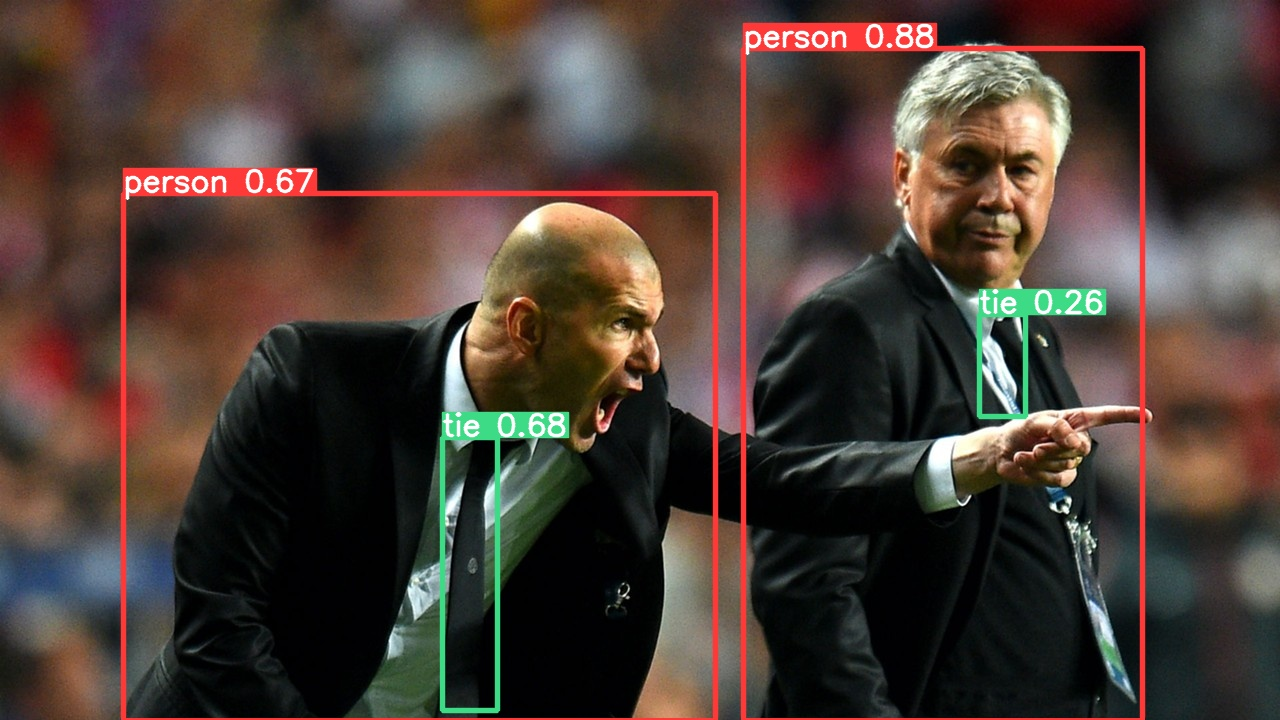

In [4]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on [COCO](https://cocodataset.org/#home) val or test-dev datasets. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be ~1% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## COCO val
Download [COCO val 2017](https://github.com/ultralytics/yolov5/blob/74b34872fdf41941cddcf243951cdb090fbac17b/data/coco.yaml#L14) dataset (1GB - 5000 images), and test model accuracy.

In [5]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [6]:
# Run YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
val: Scanning '/content/datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupt: 100% 5000/5000 [00:03<00:00, 1421.85it/s]
val: New cache created: /content/datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 157/157 [02:11<00:00,  1.20it/s]
                 all       5000      36335      0.652      0.524      0.561      0.362
Speed: 0.2ms pre-process, 16.0ms inference, 2.6ms NMS per image at s

# 3. Train

<p align=""><a href="https://roboflow.com/?ref=ultralytics"><img width="1000" src="https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br><br>


In [9]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()
# 하단에 입력창 보이면 Weights&Biases API key 붙여넣기

wandb: Currently logged in as: junhaa (use `wandb login --relogin` to force relogin)


True

In [8]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: junhaa (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

# 4. Visualize


## Weights & Biases Logging 🌟 NEW

[Weights & Biases](https://wandb.ai/site?utm_campaign=repo_yolo_notebook) (W&B) is now integrated with YOLOv5 for real-time visualization and cloud logging of training runs. This allows for better run comparison and introspection, as well improved visibility and collaboration for teams. To enable W&B `pip install wandb`, and then train normally (you will be guided through setup on first use). 

During training you will see live updates at [https://wandb.ai/home](https://wandb.ai/home?utm_campaign=repo_yolo_notebook), and you can create and share detailed [Reports](https://wandb.ai/glenn-jocher/yolov5_tutorial/reports/YOLOv5-COCO128-Tutorial-Results--VmlldzozMDI5OTY) of your results. For more information see the [YOLOv5 Weights & Biases Tutorial](https://github.com/ultralytics/yolov5/issues/1289). 

<p align="left"><img width="900" alt="Weights & Biases dashboard" src="https://user-images.githubusercontent.com/26833433/135390767-c28b050f-8455-4004-adb0-3b730386e2b2.png"></p>

## Local Logging

All results are logged by default to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc. View train and val jpgs to see mosaics, labels, predictions and augmentation effects. Note an Ultralytics **Mosaic Dataloader** is used for training (shown below), which combines 4 images into 1 mosaic during training.

> <img src="https://user-images.githubusercontent.com/26833433/131255960-b536647f-7c61-4f60-bbc5-cb2544d71b2a.jpg" width="700">  
`train_batch0.jpg` shows train batch 0 mosaics and labels

> <img src="https://user-images.githubusercontent.com/26833433/131256748-603cafc7-55d1-4e58-ab26-83657761aed9.jpg" width="700">  
`test_batch0_labels.jpg` shows val batch 0 labels

> <img src="https://user-images.githubusercontent.com/26833433/131256752-3f25d7a5-7b0f-4bb3-ab78-46343c3800fe.jpg" width="700">  
`test_batch0_pred.jpg` shows val batch 0 _predictions_

Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) as `results.csv`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.csv` file manually:

```python
from utils.plots import plot_results 
plot_results('path/to/results.csv')  # plot 'results.csv' as 'results.png'
```

<img align="left" width="800" alt="COCO128 Training Results" src="https://user-images.githubusercontent.com/26833433/126906780-8c5e2990-6116-4de6-b78a-367244a33ccf.png">

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# 실습과제

## coco128 데이터셋에 대해서 탐지 성능 개선하고 탐지 결과 분석하기


### 실습 과제1: 하이퍼파라미터(혹은 데이터증대) 수정하여 validation mAP(0.5) 성능 개선하기 x 5회 반복
- 하이퍼파라미터&데이터증대 설정 부분: yolov5/data/hyps/hyp.scratch-low.yaml
- yaml 파일 수정&저장하고 train.py 실행하기
- 코랩 세션 내 파일 확인하려면 오른쪽 '폴더' 아이콘 클릭할 것

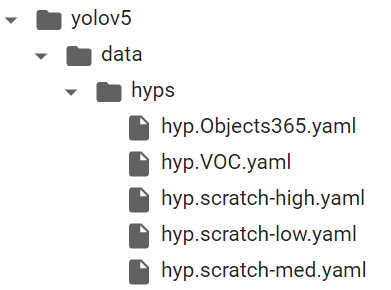

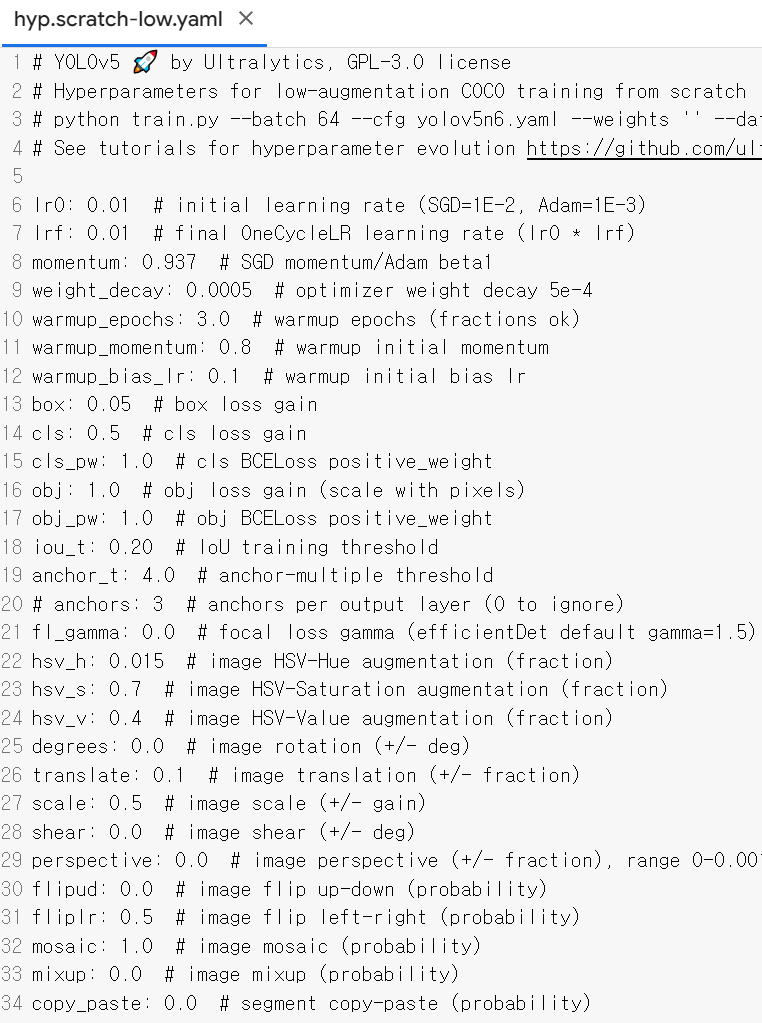

1번 학습 코드 (수정하지 말 것)
- yolov5/data/hyps/hyp.scratch-low.yaml 파일의 하이퍼파라미터 1개 수정하여 학습결과 출력하기

In [10]:
# Train YOLOv5s on COCO128 for 10 epochs // warmup_epochs 3 => 5
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: junhaa (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=5.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

2번 학습 코드 (수정하지 말 것)
- yolov5/data/hyps/hyp.scratch-low.yaml 파일의 하이퍼파라미터 1개 수정하여 학습결과 출력하기

In [12]:
# Train YOLOv5s on COCO128 for 10 epochs obj 0 = > 0.5
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: junhaa (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=0.5, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

3번 학습 코드 (수정하지 말 것)
- yolov5/data/hyps/hyp.scratch-low.yaml 파일의 하이퍼파라미터 1개 수정하여 학습결과 출력하기

In [13]:
# Train YOLOv5s on COCO128 for 10 epochs scale 0.5 =>  1.0
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: junhaa (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=0.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

4번 학습 코드 (수정하지 말 것)
- yolov5/data/hyps/hyp.scratch-low.yaml 파일의 하이퍼파라미터 1개 수정하여 학습결과 출력하기

In [14]:
# Train YOLOv5s on COCO128 for 10 epochs hsv_s 0.7 > 1.0
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: junhaa (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=0.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

5번 학습 코드 (수정하지 말 것)
- yolov5/data/hyps/hyp.scratch-low.yaml 파일의 하이퍼파라미터 1개 수정하여 학습결과 출력하기

In [15]:
# Train YOLOv5s on COCO128 for 10 epochs box 0.05 => 0.1
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache

wandb: Currently logged in as: junhaa (use `wandb login --relogin` to force relogin)
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.1, cls=0.5, cls_pw=1.0, obj=0.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f

### 실습 과제 2: 최고 성능 달성한 모델의 탐지 결과 분석(어떤 경우에 탐지 결과가 우수/미흡한지?)
- https://wandb.ai 본인 계정 로그인하여 Projects 페이지 접속
- Projects 페이지에서 최고 성능 달성한 모델의 탐지 결과 분석
- Media에서 label(정답)과 pred(예측) 차이 분석
- mAP(0.5) 성능 그래프 확인 (지속적으로 상승하는지? 수렴했는지? 편차가 큰지?)

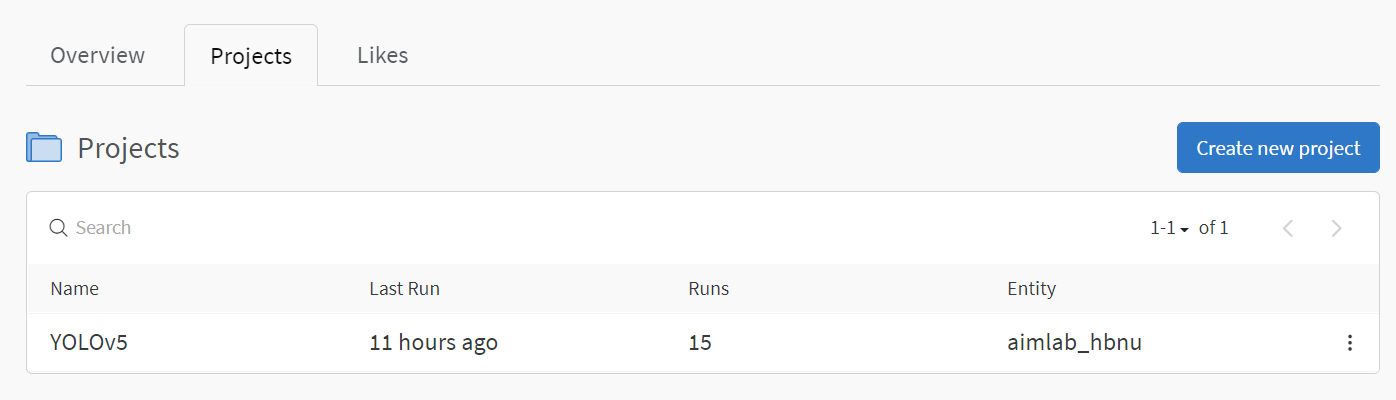

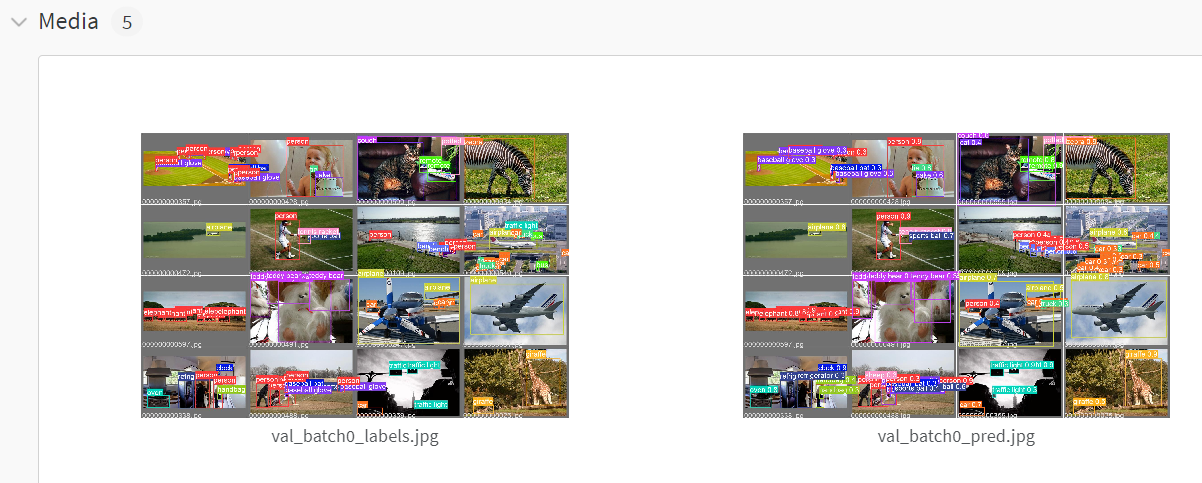

5번의 파라미터 조절 중 warmup_epochs를 3에서 5로 증가시켰을 때 가장 성능이 높았다.



*   best/mAP_0.5 0.81447
*   best/mAP_0.5:0.95 0.55914
*   best/precision 0.81917
*   best/recall 0.72826


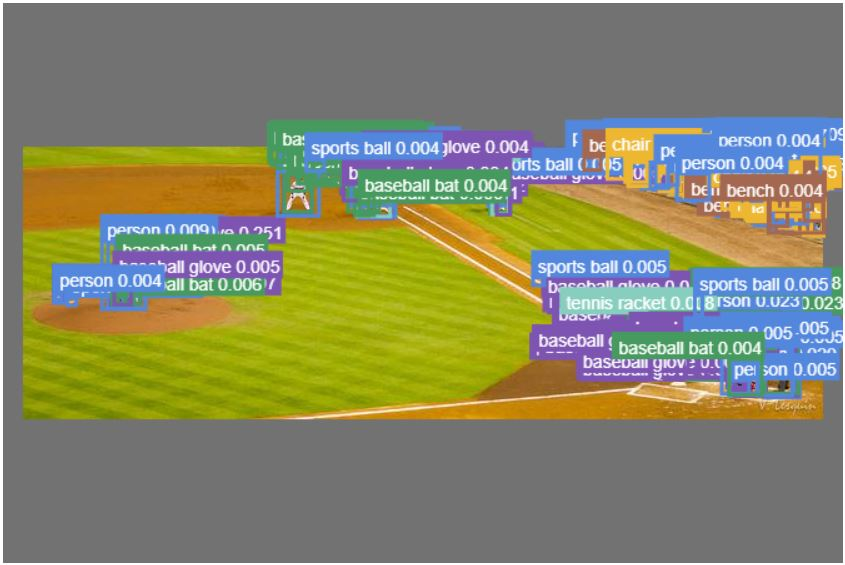

5번의 파라미터 조절 중 scale을 0.5에서 1로 증가시켰을 때 가장 성능이 낮았다.



* best/mAP_0.5 0.75022
* best/mAP_0.5:0.95 0.48149
* best/precision 0.7803
* best/recall 0.68824




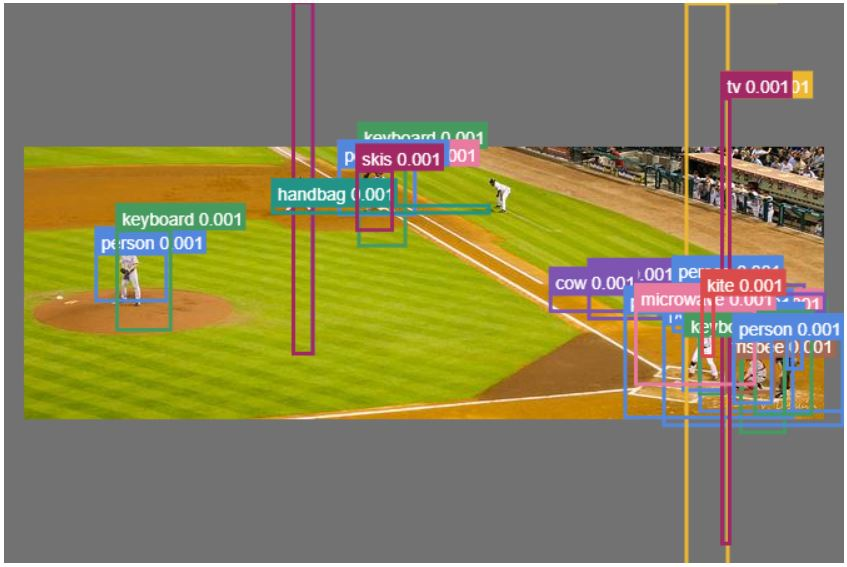

mAP(0.5) 성능은 항상 지속적으로 상승하지 않았지만 epoch가 증가 할수록 상승하는 것을 확인할 수 있었다. 하지만 일정 성능 이상 도달한 후 성능이 증가폭이 점차 줄면서 일정한 성능에 수렴했다.